In [1]:
# Дана статистика пользователей adult.csv.

# получите значения AUC для различных моделей и их параметров.

# Решением будет ссылка на гитхаб с ноутбуком.


In [2]:
import pandas as pd
import numpy as np
import matplotlib

In [3]:
data_raw = pd.read_csv('adult.csv')
data_raw.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data_raw.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print('\nworkclass:\n',data_raw['workclass'].value_counts())
print('\neducation:\n',data_raw['education'].value_counts())
print('\nmarital-status:\n',data_raw['marital-status'].value_counts())
print('\noccupation:\n',data_raw['occupation'].value_counts())
print('\nrelationship:\n',data_raw['relationship'].value_counts())
print('\nrace:\n',data_raw['race'].value_counts())
print('\ngender:\n',data_raw['gender'].value_counts())
print('\nnative-country:\n',data_raw['native-country'].value_counts())
print('\nincome:\n',data_raw['income'].value_counts())


workclass:
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

education:
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status:
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

occupation:
 Prof-specialty       6172
Craft-repair      

In [7]:
# категориальные переменные закодируем one code encoding
def one_hot_encoding(data, column_list):
    res_data =pd.concat([data,pd.get_dummies(data[column_list])], axis=1)
    res_data= res_data.drop(columns = column_list)
    return res_data
    

In [8]:
data = one_hot_encoding(data_raw, ['workclass','education','marital-status','occupation','relationship','race','native-country'])

data['gender'] = data['gender'].map({'Male':1,'Female':0}) 
data['income'] = data['income'].map({'>50K':1,'<=50K':0}) 

In [9]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y = data['income']
X = data.drop(columns=['income'])

In [13]:
# для классификации используем 3 модели:
# 1. DecisionTreeClassifier
# 2. SVC
# 3. KNeighborsClassifier
# 4. LogisticRegression
# 5. XGBClassifier 

In [14]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
label_est = ['DTC','KNC','LRC','XGBC']
est_list = [DecisionTreeClassifier(), 
            KNeighborsClassifier(), 
            LogisticRegression(),
            XGBClassifier()]
est_greedsearchsv_param = [{'criterion':['gini','entropy'],'max_depth':[3,5,7]},
                           {'n_neighbors':[1,3,5,7],'weights':['uniform', 'distance']},
                           {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1]},
                           {'max_depth': [3, 4, 5]}]

In [11]:
# разделим выборку  на обучающую(train), тестовую(test) и валидационную(valid)
# Валидационную выборку будем использовать для проверки получившихся моделей
# выборки train и test будут получаться при проведении cross_validation

In [46]:
def start(x,y): 
    clf_list = []
    res_est = []
    predictions=[]
    res=[]  

    X_train_test, X_valid, y_train_test, y_valid = train_test_split(X, y, test_size=0.25)

    for i in range(len(est_list)): 
        clf_list.append(GridSearchCV(est_list[i], est_greedsearchsv_param[i], cv=5))
        print(f'estimator {label_est[i]} готов')
    
    for i in range(len(clf_list)):    
        clf_list[i].fit(X_train_test, y_train_test)
        print(f'estimator {label_est[i]} обучен')
        res_est.append(clf_list[i].best_estimator_)

    for i in range(len(res_est)):
        predictions.append(res_est[i].predict_proba( X_valid ))

    for i in range(len(predictions)):   
        res.append(list(roc_curve( y_valid, predictions[i][:, 1])))

    for i in range(len(res)):    
        plt.plot( res[i][0], res[i][1], label = label_est[i])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend( loc = 0 )
    plt.show()  

    for i in range(len(res)):    
        print(label_est[i],':',auc( res[i][0], res[i][1]))
        
    return {'estimators': res_est, 'predictions': predictions, 'roc_curves':res}    

estimator DTC готов
estimator KNC готов
estimator LRC готов
estimator XGBC готов
estimator DTC обучен
estimator KNC обучен
estimator LRC обучен
estimator XGBC обучен


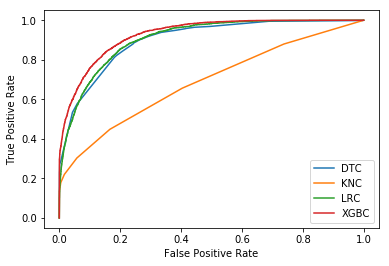

DTC : 0.9006861013388955
KNC : 0.6886525665224704
LRC : 0.9076858332660089
XGBC : 0.9287166469590252


In [41]:
res = start(X,y)

In [ ]:
# посмотрим наиболее значимые переменные при постройке деревьев

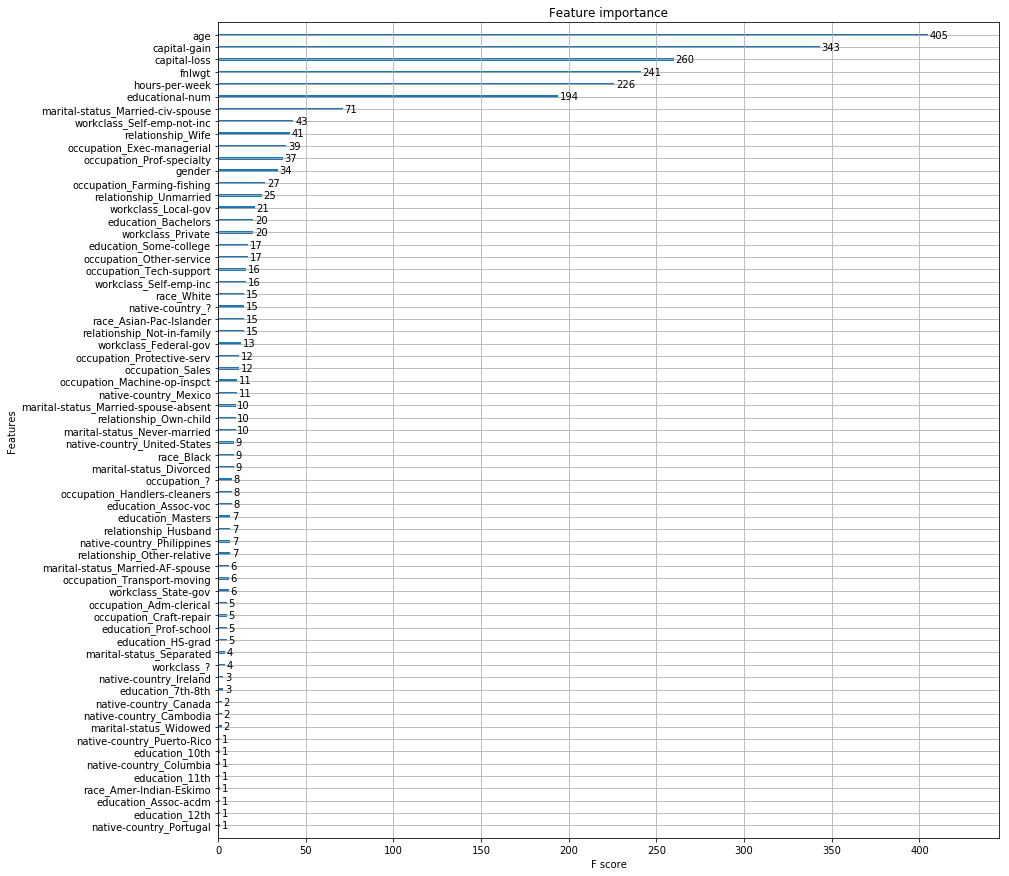

In [53]:
# для  XGBClassifier

import xgboost
matplotlib.rcParams['figure.figsize'] = (14, 15)
xgboost.plot_importance(booster=res_est[3])
plt.savefig('HW_10_1.png')

In [54]:
FI = dict(zip(X.columns.tolist(), res_est[3].feature_importances_))
sorted_x = sorted(FI.items(), key=lambda kv: -kv[1])
sorted_x[:10]

[('age', 0.16825925),
 ('capital-gain', 0.14250104),
 ('capital-loss', 0.10801828),
 ('fnlwgt', 0.100124635),
 ('hours-per-week', 0.09389281),
 ('educational-num', 0.08059826),
 ('marital-status_Married-civ-spouse', 0.0294973),
 ('workclass_Self-emp-not-inc', 0.017864563),
 ('relationship_Wife', 0.017033651),
 ('occupation_Exec-managerial', 0.016202742)]

In [56]:
# для DecisionTreeClassifier

FI2 = dict(zip(X.columns.tolist(), res_est[0].feature_importances_))
sorted_x = sorted(FI2.items(), key=lambda kv: -kv[1])
sorted_x[:10]

[('marital-status_Married-civ-spouse', 0.4350368321224089),
 ('educational-num', 0.23166945779571915),
 ('capital-gain', 0.19669378014524042),
 ('capital-loss', 0.0698140919006194),
 ('age', 0.035032969817330235),
 ('hours-per-week', 0.02026701789011778),
 ('occupation_Exec-managerial', 0.004035190583723473),
 ('relationship_Wife', 0.0019185759971103342),
 ('education_Bachelors', 0.0014914645916232598),
 ('fnlwgt', 0.0009714789205200148)]

In [ ]:
# из полученного видно, что первые 6 переменных в обоих классивфикаторах совпадают
# обучим модели оставив в данных только эти параметры
# 1) marital-status
# 2) educational-num
# 3) capital-gain
# 4) capital-loss
# 5) age
# 6) hours-per-week

In [63]:
list_drop = list(set(data_raw.columns.tolist()) - set(['marital-status' , 'educational-num', 'capital-gain', 'capital-loss', 'age', 'hours-per-week',]))

data_raw_red = data_raw.drop(columns=list_drop)

In [64]:
data_raw_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
age                48842 non-null int64
educational-num    48842 non-null int64
marital-status     48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


In [65]:
data2 = one_hot_encoding(data_raw_red, ['marital-status'])

data2.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,7,0,0,40,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,0,0
2,28,12,0,0,40,0,0,1,0,0,0,0
3,44,10,7688,0,40,0,0,1,0,0,0,0
4,18,10,0,0,30,0,0,0,0,1,0,0


In [66]:
y_2 = y
X_2 = data2

estimator DTC готов
estimator KNC готов
estimator LRC готов
estimator XGBC готов
estimator DTC обучен
estimator KNC обучен
estimator LRC обучен
estimator XGBC обучен


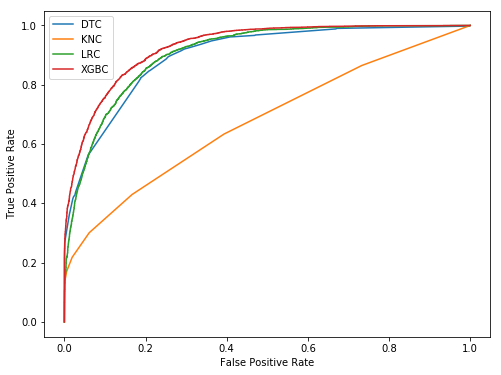

DTC : 0.8986016563430158
KNC : 0.6769193791985788
LRC : 0.9068453746514665
XGBC : 0.9290935591889317


In [69]:
matplotlib.rcParams['figure.figsize'] = (8, 6)
res = start(X_2,y_2)

In [ ]:
# Из результатов видно, что  